In [58]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

import os
import psycopg2
import numpy as np
import pandas as pd
import polars as pl
from dotenv import load_dotenv
import matplotlib.pyplot as plt


In [59]:
load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = int(os.getenv("DB_PORT"))
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")
DATA_FOLDER = os.getenv("DATA_FOLDER")

In [60]:
bigbrotr = psycopg2.connect(
    host=DB_HOST,
    port=DB_PORT,
    user=DB_USER,
    password=DB_PASSWORD,
    dbname=DB_NAME
)

In [ ]:
events_relays = pl.read_csv(os.path.join(DATA_FOLDER, 'events_relays.csv'))
events = pl.read_csv(os.path.join(DATA_FOLDER, 'events.csv')).rename({'id': 'event_id'})
events_relays = events_relays.join(events, on='event_id', how='left')
pubkey_rw_relay = pl.read_csv(os.path.join(DATA_FOLDER, 'pubkey_rw_relay.csv'))

In [ ]:
relay_stats = pd.read_csv(os.path.join(DATA_FOLDER, 'relay_stats.csv'))
nunique_pubkeys = events_relays.select(pl.col("pubkey").n_unique()).to_numpy()[0][0]
nunique_events = events_relays.select(pl.col("event_id").n_unique()).to_numpy()[0][0]

In [63]:
def plot_cdf(data, label):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

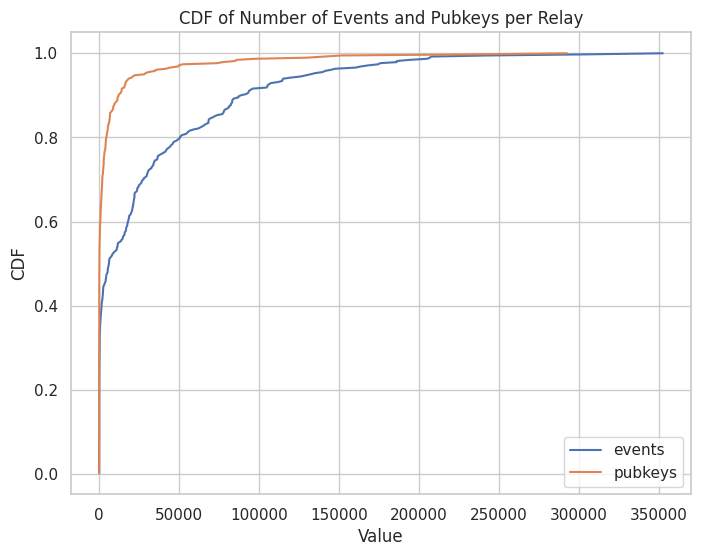

In [ ]:
plt.figure(figsize=(8,6))
plot_cdf(relay_stats['num_events'], 'events')
plot_cdf(relay_stats['num_pubkeys'], 'pubkeys')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of Number of Events and Pubkeys per Relay')
plt.legend()
plt.grid(True)
plt.show()

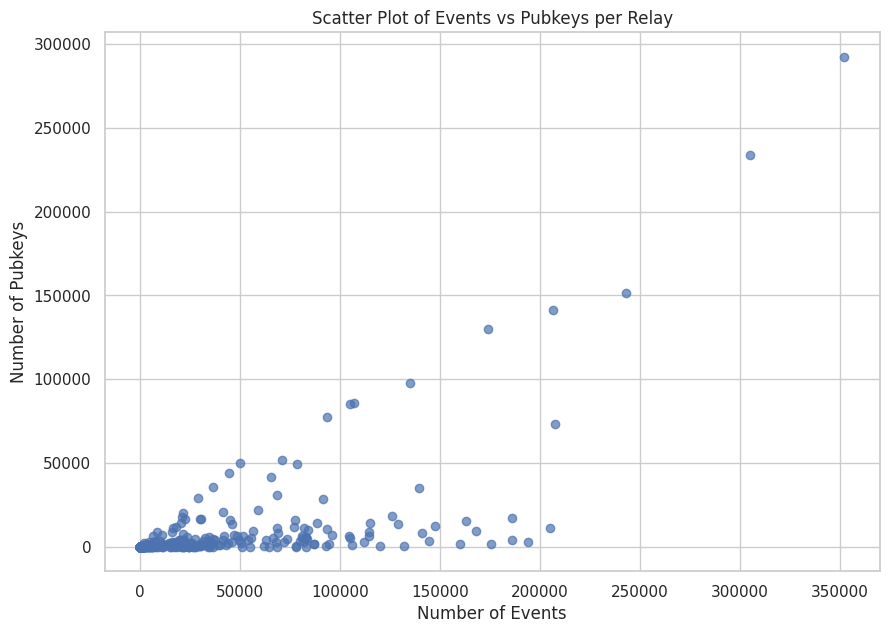

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(relay_stats["num_events"], relay_stats["num_pubkeys"], alpha=0.7)
plt.xlabel("Number of Events")
plt.ylabel("Number of Pubkeys")
plt.title("Scatter Plot of Events vs Pubkeys per Relay")
plt.grid(True)
plt.show()

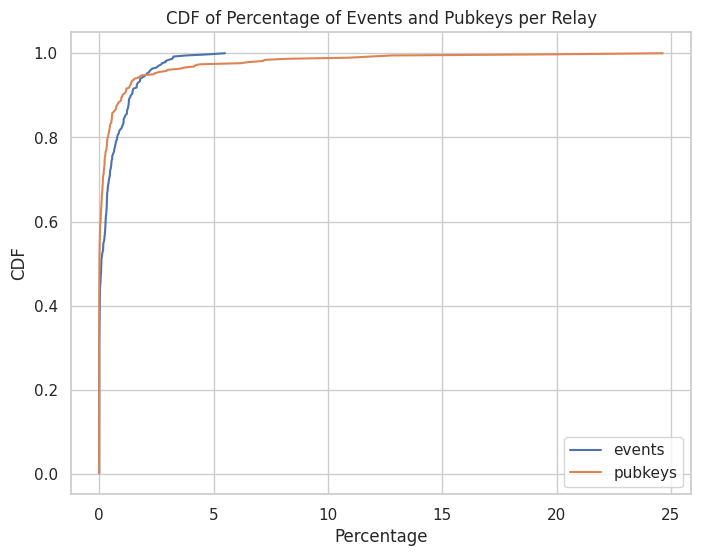

In [ ]:
plt.figure(figsize=(8,6))
plot_cdf(relay_stats["pct_events"], "events")
plot_cdf(relay_stats["pct_pubkeys"], "pubkeys")
plt.xlabel("Percentage")
plt.ylabel("CDF")
plt.title("CDF of Percentage of Events and Pubkeys per Relay")
plt.legend()
plt.grid(True)
plt.show()

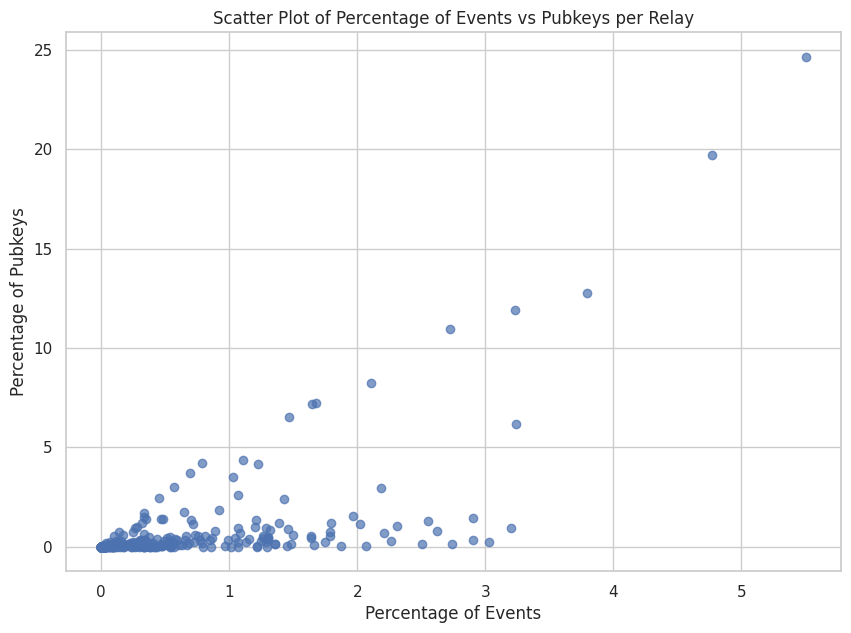

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(relay_stats["pct_events"], relay_stats["pct_pubkeys"], alpha=0.7)
plt.xlabel("Percentage of Events")
plt.ylabel("Percentage of Pubkeys")
plt.title("Scatter Plot of Percentage of Events vs Pubkeys per Relay")
plt.grid(True)
plt.show()

In [76]:
event_share =  (
    events_relays.group_by("event_id")
    .agg(pl.col("relay_url").n_unique().alias("num_relays"))
    .sort("num_relays", descending=True)
)
pubkey_share = (
    events_relays.group_by("pubkey")
    .agg(pl.col("relay_url").n_unique().alias("num_relays"))
    .sort("num_relays", descending=True)
)

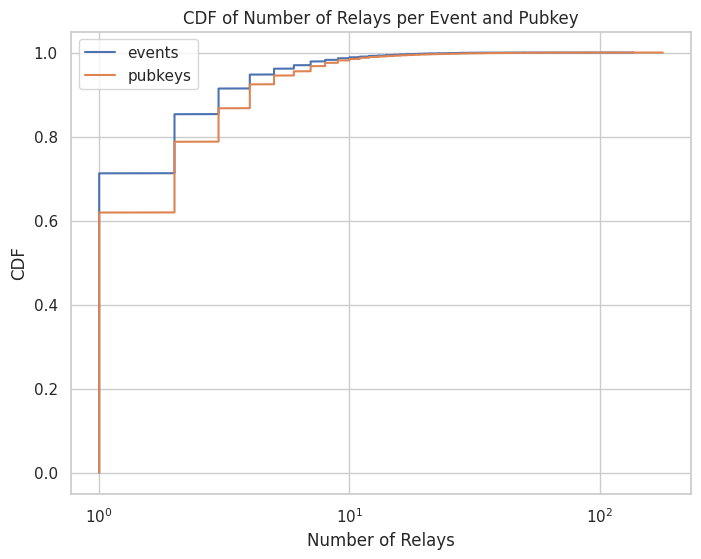

In [77]:
plt.figure(figsize=(8,6))
plot_cdf(event_share['num_relays'], 'events')
plot_cdf(pubkey_share['num_relays'], 'pubkeys')
plt.xscale('log')
plt.xlabel('Number of Relays')
plt.ylabel('CDF')
plt.title('CDF of Number of Relays per Event and Pubkey')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# top 10 relays by events
# top 10 relays by pubkeys
# eventi piu' distribuiti
# pubkey piu' distribuite